In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib as mpl

%matplotlib inline

In [17]:
df=pd.read_csv("GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv")

In [18]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


        Locating the data for Delhi

In [19]:
df_delhi=df[df["City"]=="Delhi"]
df_delhi.reset_index(drop=True,inplace=True)

In [24]:
pd.options.mode.chained_assignment = None  #to ignore SettingWithCopyWarning warning
#df_delhi.interpolate(method='linear',inplace=True)
df_delhi.dropna(inplace=True)

df_delhi['dt']=pd.to_datetime(df_delhi['dt'])

df_delhi['Year']=df_delhi['dt'].dt.year
df_delhi['Month']=df_delhi['dt'].dt.month

delhi_year=df_delhi.groupby(by='Year')

#len(df_delhi['Year'].unique())

201

### Plotting only the last 50 years

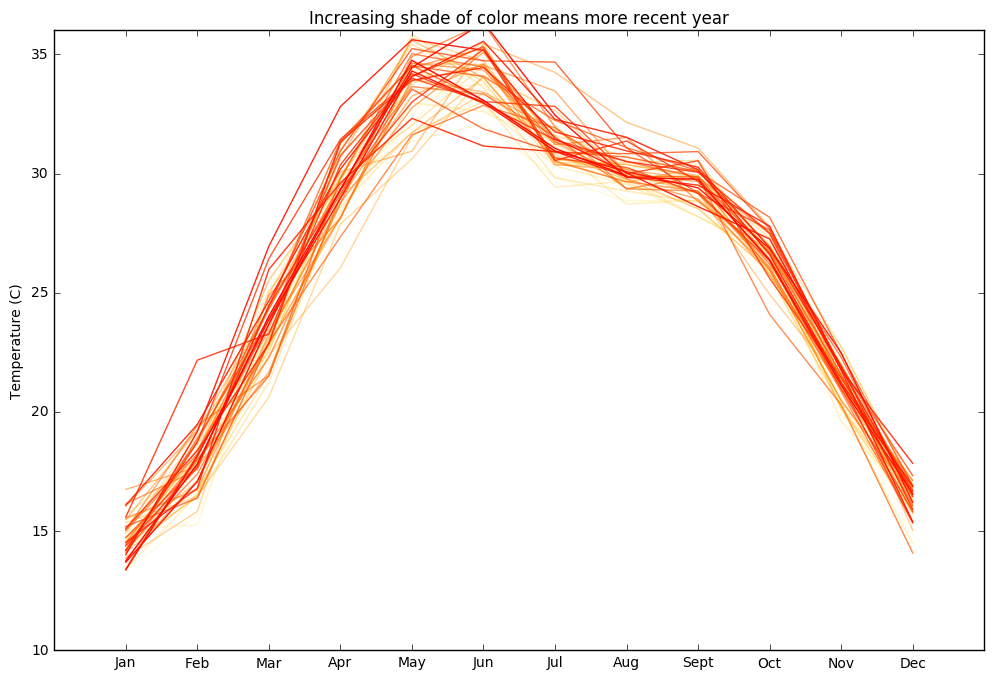

In [55]:
plt.figure(figsize=(12,8))

cmap = mpl.cm.autumn_r
nsteps=len(df_delhi['Year'].unique())

for i in (range(nsteps-50,nsteps)):
    data=list(delhi_year)[i][1]
    plt.ylim([10,36])
    plt.xlim([0,13])
    plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
    plt.ylabel("Temperature (C)")
    plt.title("Increasing shade of color means more recent year")
    plt.plot(data['Month'],data['AverageTemperature'],color=cmap((i-150) / float(51)),alpha=((i-150) / float(51))
             ,label=list(delhi_year)[i][0])
    
plt.show()